## Assignment 3: Logistic Regression {-}

This assignment aims at familiarizing you with the use of Logistic Regression model supported by scikit-learn. You will have to:

- Analyze the data.
- Process the data.
- Split train/test sets.
- Train a Logistic Regression model using the training set, then make prediction on the test set.
- Evaluate the model performance on the test set using the following metrics: precision, recall, f1 score, and print out the confusion matrix.

The dataset you will be working on is 'heart-disease.csv'. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, etc. This dataset is to predict, based on the given attributes of a patient, whether that particular person has a heart disease or not.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named DataViz-\<StudentID>-Assignment3 (e.g., DataViz-2012345-Assigment3) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you split the data for training and testing purpose, then build a classification model and evaluate its performance.

Note that the evaluation will not consider the model accuracy as the highest priority, but how properly you handle the data and use scikit-learn to build the classifier.

### Deadline {-}
Please visit Canvas for details.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart-disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


### Data features: {-}

* age: The person’s age in years
* **sex**: The person’s sex (1 = male, 0 = female)
* **cp**: chest pain type
  * Value 0: asymptomatic
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl (mg/dl: milligrams per decilitre)
* **fbs**: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) (Fasting blood glucose: A test to determine how much glucose (sugar) is in a blood sample after an overnight without eating).
* **restecg**: resting electrocardiographic results
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  * Value 1: normal
  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* **exang**: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
* **slope**: the slope of the peak exercise ST segment
  * 0: downsloping
  * 1: flat
  * 2: upsloping
* **ca**: The number of major vessels (values in 0–3)
* **thal**: A blood disorder called thalassemia
  * Value 0: NULL (dropped from the dataset previously
  * Value 1: fixed defect (no blood flow in some part of the heart)
  * Value 2: normal blood flow
  * Value 3: reversible defect (a blood flow is observed but it is not normal)
  
### Data label: {-}

* target: Heart disease (1 = no, 0= yes)

## Analyze 

In [4]:
df.shape

(886, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The data consists only of numerical data. In 14 numerica variables, `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca` and `thal` 

In [7]:
# create `continuous_features` list
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# create `categorical_features` list
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

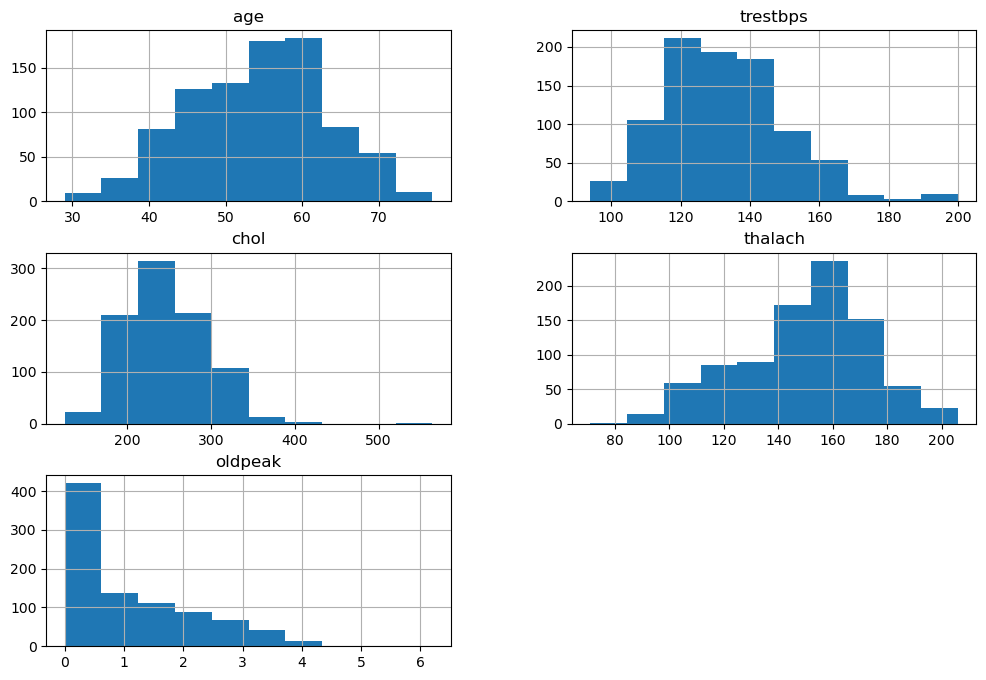

In [8]:
# continuois features distribution
df.hist(column=continuous_features, figsize=(12, 8))

<Axes: xlabel='sex', ylabel='count'>

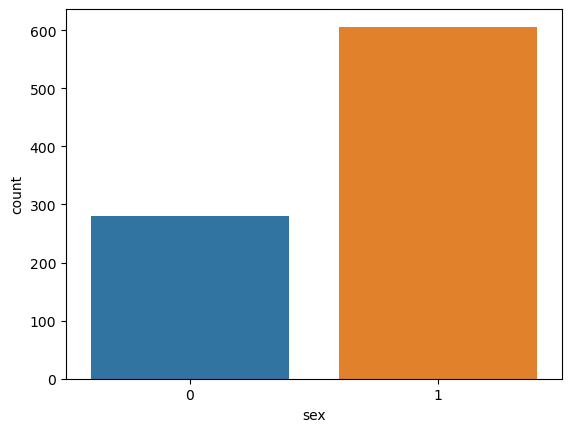

In [9]:
sns.countplot(x='sex', data=df)

There is more `male` than `female`.

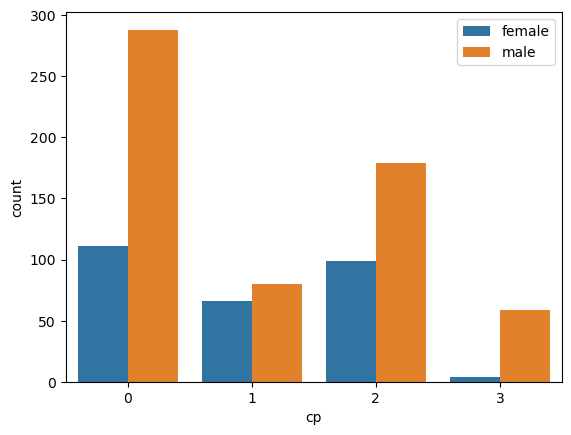

In [26]:
sns.countplot(x='cp', data=df, hue='sex')
plt.legend(labels=['female', 'male'])
plt.show()

<Axes: xlabel='fbs', ylabel='count'>

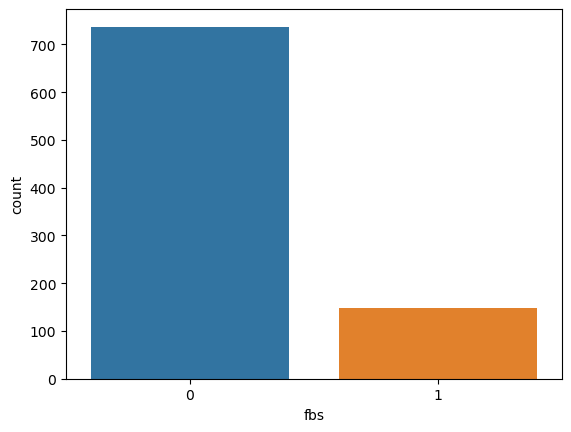

In [12]:
# Fasting blood glucose
sns.countplot(x='fbs', data=df)

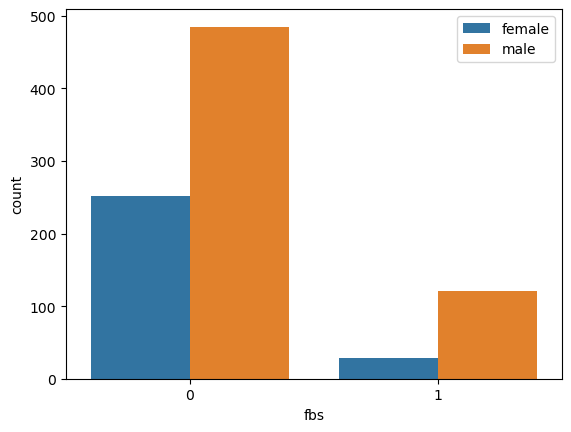

In [28]:
# Fasting blood glucose and the sex variable
sns.countplot(x='fbs', data=df, hue='sex')
plt.legend(labels=['female', 'male'])
plt.show()

<Axes: xlabel='restecg', ylabel='count'>

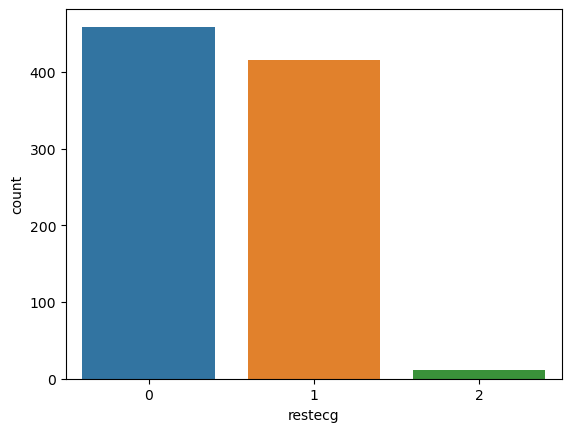

In [13]:
sns.countplot(x='restecg', data=df)

<Axes: xlabel='exang', ylabel='count'>

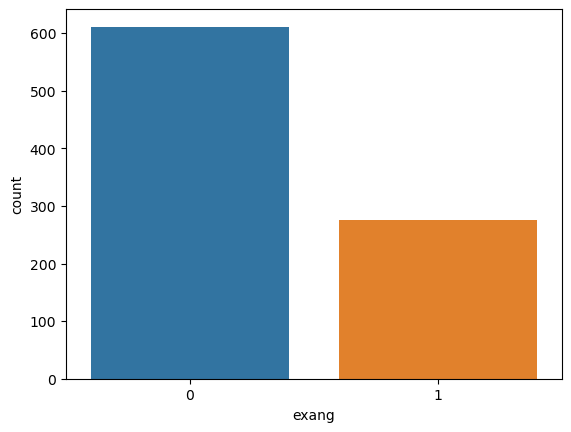

In [14]:
sns.countplot(x='exang', data=df)

<Axes: xlabel='slope', ylabel='count'>

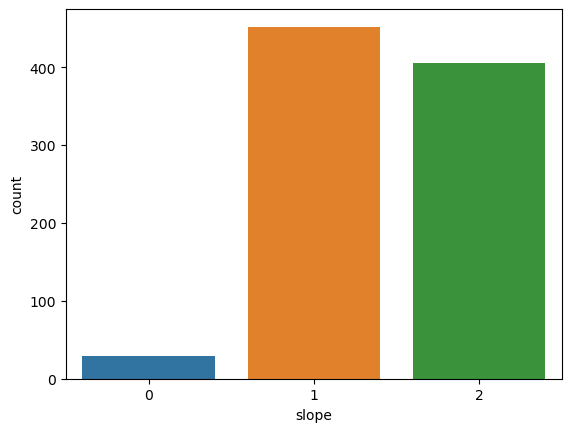

In [15]:
sns.countplot(x='slope', data=df)

<Axes: xlabel='ca', ylabel='count'>

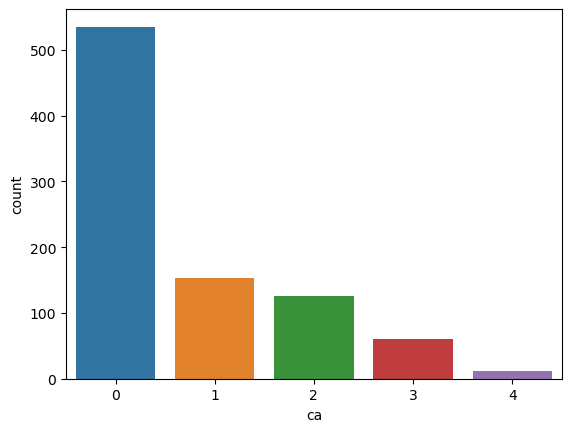

In [16]:
sns.countplot(x='ca', data=df)

<Axes: xlabel='thal', ylabel='count'>

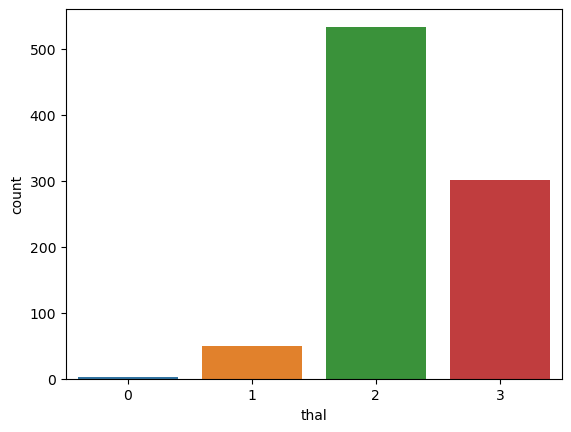

In [17]:
sns.countplot(x='thal', data=df)

<Axes: xlabel='target', ylabel='count'>

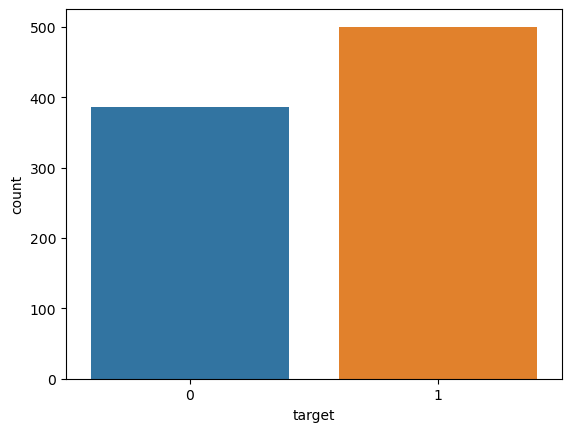

In [18]:
# the target variable
sns.countplot(x='target', data=df)

<Axes: >

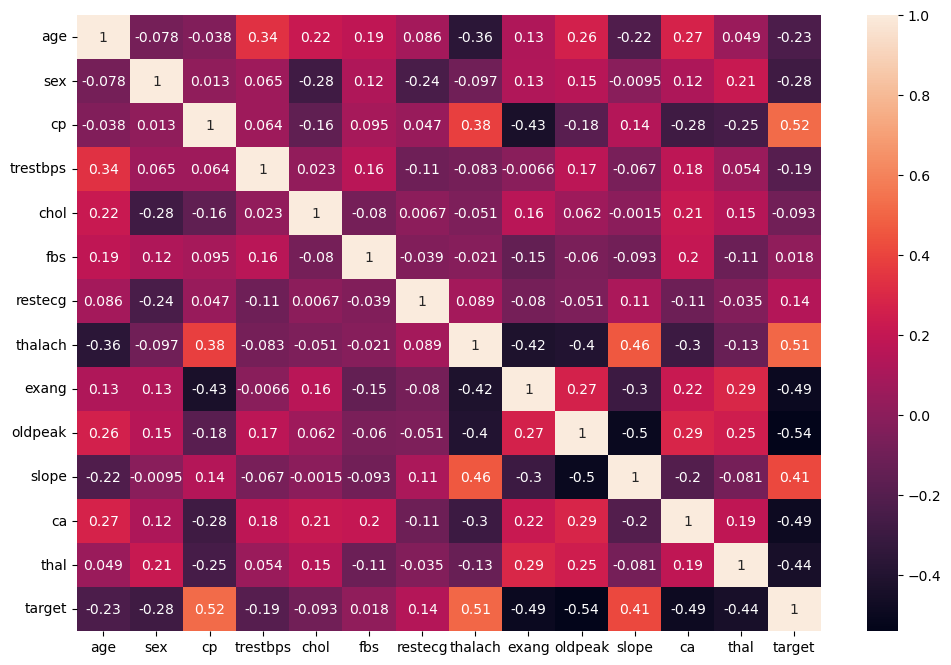

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

## Process data 

In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

there is no null variable.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


There is no `object` dtype, so there is no need to encode.

In [20]:
y = df['target']
X = df.drop(['target'], axis=1)

In [21]:
# split the dataset into train and test, ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((708, 13), (178, 13), (708,), (178,))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Train the model 

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train_scaler, y_train)

LogisticRegression()

## Evaluate based on the test set: recall, precision, f1-score

In [34]:
# calculate test accuracy
logmodel.score(X_test_scaler, y_test)

0.9606741573033708

In [35]:
# make predictions
predictions = logmodel.predict(X_test_scaler)
final_predictions = pd.DataFrame({'Target': predictions})
final_predictions.head()

,Target
0,1
1,0
2,0
3,0
4,1


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 68,   4],
       [  3, 103]])

In [37]:
# Evaluation metrics calculation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Precision: ", precision_score(logmodel.predict(X_test_scaler), y_test))
print("Recall: ", recall_score(logmodel.predict(X_test_scaler), y_test))
print("F1: ", f1_score(logmodel.predict(X_test_scaler), y_test))
print("Confusion matrix: \n", confusion_matrix(logmodel.predict(X_test_scaler), y_test))
print("Classification report: \n", classification_report(logmodel.predict(X_test_scaler), y_test))

Precision:  0.9716981132075472
Recall:  0.9626168224299065
F1:  0.9671361502347416
Confusion matrix: 
 [[ 68   3]
 [  4 103]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.97      0.96      0.97       107

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178

